In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [59]:
coffee_production_df = pd.read_csv('../Data/Cleaned/coffee_production_df.csv')
coffee_prices_df = pd.read_csv('../Data/Cleaned/coffee_prices.csv')
elnino_lanina_df = pd.read_csv('../Data/Cleaned/elnino_lanina.csv')

# first merge
first_merge = pd.merge(coffee_production_df, coffee_prices_df, on='Years')

# Delete extra index column
del first_merge['Unnamed: 0']

# Second merge
coffee_data_df = pd.merge(first_merge, elnino_lanina_df, on='Years')

# Display df
coffee_data_df.head()

,Country,City,Latitude,Longitude,Coffee type,Years,Total Production,Global Price of Arabica Coffee (US cents per a lb),Global Price of Robusta Coffee (US cents per a lb),Oceanic Nino Index,El Nino or La Nina Year,Magnitude
0,Angola,Bailundo,-12.1650,15.3694,Robusta/Arabica,1990,3.000000e+06,89.15,54.99,0.375,El Nino,Neutral
1,Bolivia,Coroico,-16.1889,-67.7273,Arabica,1990,7.380000e+06,89.15,54.99,0.375,El Nino,Neutral
2,Brazil,Poços de Caldas,-21.7800,-46.5692,Arabica/Robusta,1990,1.637160e+09,89.15,54.99,0.375,El Nino,Neutral
3,Burundi,Bukeye,-3.0830,29.3670,Arabica/Robusta,1990,2.922000e+07,89.15,54.99,0.375,El Nino,Neutral
4,Ecuador,Zamora,-4.0692,-78.9567,Arabica/Robusta,1990,9.024000e+07,89.15,54.99,0.375,El Nino,Neutral


## Questions

How has El Nino/La Nina patterns impacted coffee prices?


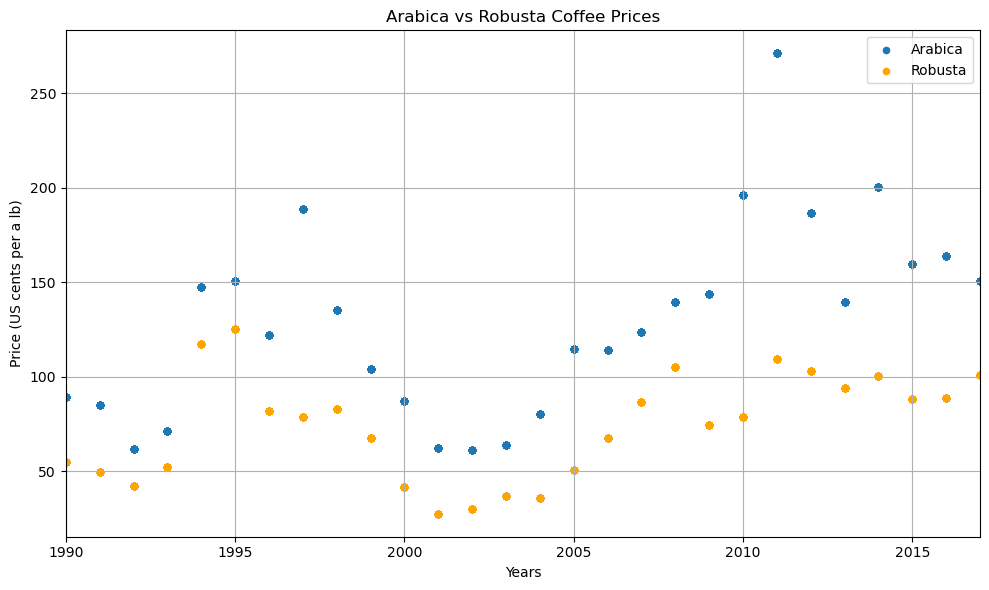

In [81]:

# Calculate the minimum and maximum years
year_start = coffee_data_df['Years'].min()
year_end = coffee_data_df['Years'].max()

# Create a scatter plot for Arabica and Robusta prices
ax = coffee_data_df.plot(kind='scatter', x='Years', y='Global Price of Arabica Coffee (US cents per a lb)', figsize=(10, 6), label='Arabica')
coffee_data_df.plot(kind='scatter', x='Years', y='Global Price of Robusta Coffee (US cents per a lb)', ax=ax, color='orange', label='Robusta')


# Setting x-axis limits to display years from the minimum to maximum 'Years' values
ax.set_xlim(year_start, year_end)

plt.title('Arabica vs Robusta Coffee Prices')
plt.xlabel('Years')
plt.ylabel('Price (US cents per a lb)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [61]:
# Save .csv to 'Cleaned' folder
coffee_data_df.to_csv('../Data/Cleaned/coffee_data_df.csv', index=False)
